# Exploring The Most Popular Songs On Spotify In America, In 2017 #

This dataset represents the top 98 most popular songs on Spotify in America in 2017, as measured by Spotify and released to the public via an [ordered playlist](https://open.spotify.com/user/spotify/playlist/37i9dQZF1DX7Axsg3uaDZb?si=Y25M-dckR5mSQuMenBNBxA) at the end of the year . Spotify maintains a large amounts of track-level data for songs on the platform, including both objective measures (i.e. duration of song) and Spotify-defined metrics created using machine learning functions (i.e. danceability). The below dataset was acquired using Spotipy, a package which allows one to work with Spotify's API to gather such track-level data. 

My notebook which used Spotipy to gather the dataset is titled "Spotify Initial 2017 Data Collection.ipynb"; it is also in the data_analysis folder. In this notebook, I will call upon the already-developed dataset and begin cleaning and examining the dataset. 

Source: Spotify Web API, [Spotify Top Tracks of 2017: USA](https://open.spotify.com/user/spotify/playlist/37i9dQZF1DX7Axsg3uaDZb?si=IAEexkHXRTGnpkaGpZ0Fxw)

Downloaded: 11/22/2021

Srinidhi Ramakrishna

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
spotifyraw2017 = pd.read_csv("../data/spotify2017raw.csv")

In [3]:
spotifyraw2017.head()

,Unnamed: 0,name,album,artist,release_date,duration_ms,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,positiveness,explicit
0,0,HUMBLE.,DAMN.,Kendrick Lamar,2017-04-14,177000,82,0.908,0.000282,0.908,0.621,0.000054,0.0958,-6.638,0.1020,150.011,4,0.421,True
1,1,XO Tour Llif3,Luv Is Rage 2,Lil Uzi Vert,2017-08-25,182706,83,0.732,0.002640,0.732,0.750,0.000000,0.1090,-6.366,0.2310,155.096,4,0.401,True
2,2,Shape of You,÷ (Deluxe),Ed Sheeran,2017-03-03,233712,86,0.825,0.581000,0.825,0.652,0.000000,0.0931,-3.183,0.0802,95.977,4,0.931,False
3,3,Congratulations,Stoney (Deluxe),Post Malone,2016-12-09,220293,82,0.630,0.215000,0.630,0.804,0.000000,0.2530,-4.183,0.0363,123.146,4,0.492,True
4,4,Despacito - Remix,Despacito Feat. Justin Bieber (Remix),Luis Fonsi,2017-04-17,228826,2,0.694,0.229000,0.694,0.815,0.000000,0.0924,-4.328,0.1200,88.931,4,0.813,False


Basic data frame examination, explaining the rows, columns, and dimensions, of the dataset, was completed in the notebook "Spotify Analysis 2020 (Step 1)"; thus, beyond displaying this dataset's dimensions, I will not repeat it. The columns are the same in both datasets, as are the meanings of the rows!

In [4]:
spotifyraw2017.shape

(98, 19)

This dataset has 98 rows, each representing a different song, and 19 columns.

### Data Cleaning ###

Here, I will quickly perform the same data cleanup steps as was performed in "Spotify Analysis 2020 (Step 1)". First, I will remove the 'popularity' and 'time_signature' columns. Notice that there is also a duplicate column (danceability.1 contains the same data values as danceability) - thus, I will also remove the danceability.1 column. 

Next, I will rename the row Unnamed: 0 to 'rank' to indicate that it represents popularity rankings of the songs in the dataset; since the most popular song is denoted as '0', I will add 1 to all values in this column so that the most popular song is denoted as '1', the 50th most popular song is denoted as 50, and so on and so forth. 

In addition, I will convert the duration_ms column from milliseconds to seconds for readability. 

In [5]:
# Dropping popularity and time signature
spotifytop2017 = spotifyraw2017.drop(['popularity', 'time_signature', 'danceability.1'], axis = 1)

# Setting rank column
spotifytop2017 = spotifytop2017.rename(columns = {"Unnamed: 0": "rank"})
spotifytop2017['rank'] = spotifytop2017['rank'] + 1

# Converting and creating duration column
spotifytop2017['duration_sec'] = spotifytop2017['duration_ms']/1000
spotifytop2017 = spotifytop2017.drop(['duration_ms'], axis = 1)

In [6]:
spotifytop2017.sample(1)

,rank,name,album,artist,release_date,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,positiveness,explicit,duration_sec
73,74,Rolex,Rolex,Ayo & Teo,2017-03-15,0.804,0.0837,0.886,0.0,0.266,-2.512,0.04,144.946,0.789,False,238.586


### Data Analysis ###

#### Block 1 #####

Question: Does danceability and energy tend to increase in songs higher up on the Spotify charts? 

Steps: A) Break up the 98 songs into 7 equally sized bins of 14 songs. B) Calculate the mean danceability and energy within each of these bins. C) Plot these mean statistics in a line graph where the bins are on the x-axis. 

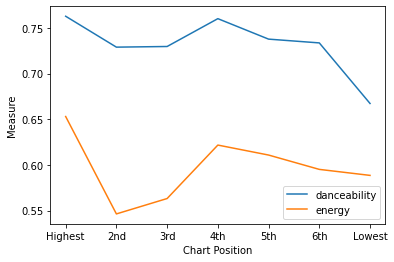

In [7]:
bins = [0, 14, 28, 42, 56, 70, 84, 98]
labels = ["Highest", "2nd", "3rd", "4th", "5th", "6th", "Lowest"]

# Creating bins
spotifytop2017['rank_range'] = pd.cut(spotifytop2017['rank'], bins = bins, labels = labels) 

# Grouping by bins and plotting metrics
spotifytop2017.groupby('rank_range')[['danceability', 'energy']].mean().plot(xlabel = 'Chart Position', ylabel = 'Measure');


#### Answer/Observations/Interpretations: ####

These plots support the hypothesis that danceability and energy are higher in songs closer to the top of the charts, than songs a bit further down. This is especially clear for danceability - songs at the highest part of the charts show relatively much more danceability than songs at the lowest part of the top 98, although there is some variability in the middle. 

Of course, all the songs in this dataset are among the most popular in general; however, it is still useful to plot how these metrics may change as one goes down the charts. Note that the shape of the danceability and energy lines are similar; this is likely due to similarities in how Spotify's machine learning models calculate these two models (i.e. perhaps they are both in part correlated to an identical third metric).

#### Block 2 #####

Question: Do songs popular on Spotify in 2017 get shorter the more popular they are? 

Steps: First, I will conduct a similar analysis as Block 1 (A) Break up the 98 songs into 7 equally sized bins of 14 songs. B) Calculate the mean duration in seconds within each of these bins. C) Plot this mean statistic in a line graph where the bins are on the x-axis.) After, I will visualize the distribution of song lengths at large in the dataset, and see what lengths the most songs cluster around. For exploratory and perhaps future purposes, I would also like to know the mean duration of songs in this dataset.

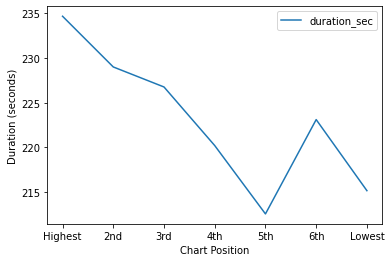

In [8]:
# Grouping by bins and plotting metrics
spotifytop2017.groupby('rank_range')[['duration_sec']].mean().plot(xlabel = 'Chart Position', ylabel = 'Duration (seconds)');


Text(0.5, 0, 'Duration (sec)')

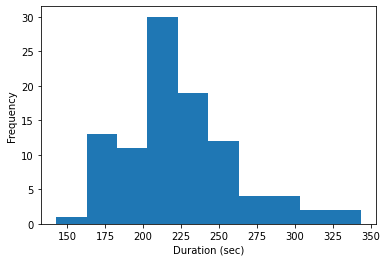

In [9]:
spotifytop2017['duration_sec'].plot(kind='hist', bins=10); # Creates histogram with ten bins
plt.xlabel("Duration (sec)")

In [10]:
spotifytop2017['duration_sec'].mean()

223.07481632653062

#### Answer/Observations/Interpretations ####

My hypothesis was actually disproved with this analysis. The first graph offered support to the conflicting idea that in 2017, the most popular songs on Spotify tended to be a bit longer than songs a bit lower on the charts. While the songs highest on the list were about 235 seconds, (3.9 minutes), the songs at the bottom were about 215 seconds (3.6 minutes); although there is some modulation in the 6th bin, for the most part the trend is fairly consistent in the negative direction. 

The second plot showed that the most songs clustered between about 205 and 220 seconds (3.4 and 3.67 minutes), a slightly negatively skewed distribution. Upon first glance, when I later place this data in comparison with 2020 data, it is clear that songs on the 2017 Spotify charts tended to be a bit longer than songs on the 2020 Spotify charts by more than 20-30 seconds. 

##### Block 3 ##### 

Question: Do explicit songs rate higher on energy or danceability than non-explicit songs?

Steps: A) Group dataset by values in the 'explicit' column, B) Find mean of the 'energy' and 'danceability' columns

In [11]:
# Grouping metrics by explicitness or lack thereof before calculating means
spotifytop2017.groupby('explicit')[['energy','danceability']].mean() 

,energy,danceability
explicit,,
False,0.638641,0.693821
True,0.569356,0.756407


#### Answer/Observations/Interpretations ####

This data shows that explicit songs tend to have slightly less energy than non-explicit songs; it also shows that explicit songs tend to have more danceability than non-explicit songs. 

Of course, this is based on an small, arbitrary sample and cannot be assumed to mean a general conclusion. It is interesting to compare this with the 2020 findings, which showed that explicit songs are higher in both energy and danceability. 

#### Block 4 ####

Question: Do songs popular on Spotify in 2017 get faster the more popular they are? 

Steps: I will perform similar steps as in Block 1 and 2 (my analysis of duration). First, I will conduct a similar analysis as Block 1. (A – Break up the 98 songs into 7 equally sized bins of 14 songs. B – Calculate the mean tempo within each of these bins. C – Plot this mean statistic in a line graph where the bins are on the x-axis.) After, I will visualize the distribution of tempos at large in the dataset, and see what BPM the most songs cluster around. For exploratory and perhaps future purposes, I would also like to know the mean tempo of songs in this dataset.

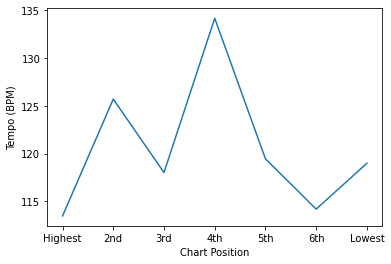

In [12]:
# Grouping by bins and plotting metrics
spotifytop2017.groupby('rank_range')['tempo'].mean().plot(xlabel = 'Chart Position', ylabel = 'Tempo (BPM)');


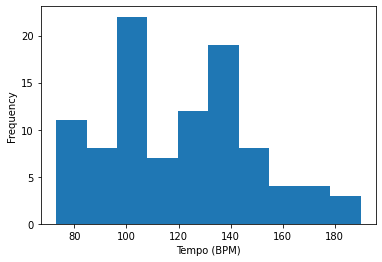

In [13]:
# Creates histogram with ten bins
spotifytop2017['tempo'].plot(kind='hist', bins=10);
plt.xlabel("Tempo (BPM)");

In [14]:
spotifytop2017['tempo'].mean()

120.56568367346938

#### Answer/Observations/Interpretations ####

This analysis shows that there may actually not be any discernible pattern in tempo as it relates to songs popular on Spotify. This may also be influenced by the unreliability of tempo-measuring technologies (i.e. a song that is 180 BPM may also be classified as 90 BPM). Indeed, after conducting this analysis, I noticed irregularities like this in the data that would be unfeasible to parse out. Thus, I may not conduct more tempo analyses in the future. 

##### Block 5 #####

Question: How do the artists with the most songs popular on Spotify in 2017 compare in acousticness to the rest of the charts?

Steps: A) Find the artists who have the most songs in the dataset, B) Create filters subsetting to just the artists with the most songs, C) Subset the dataset via those filters, D) Find the mean acousticness of the new dataset, E) Find the mean acousticness of the original dataset and compare.

In [15]:
spotifytop2017['artist'].value_counts()

Kendrick Lamar      5
Post Malone         5
Drake               5
Migos               3
The Chainsmokers    3
                   ..
Shelley FKA DRAM    1
Liam Payne          1
Demi Lovato         1
Halsey              1
J. Cole             1
Name: artist, Length: 63, dtype: int64

In [16]:
# Creates filters by artist name
kendrick_filter = spotifytop2017['artist'] == 'Kendrick Lamar'
post_filter = spotifytop2017['artist'] == 'Post Malone'
drake_filter = spotifytop2017['artist'] == 'Drake'

# Subsets dataset by filters
top_artists_spotify2017 = spotifytop2017[kendrick_filter | post_filter | drake_filter]

In [17]:
top_artists_spotify2017['acousticness'].mean()

0.11946413333333333

In [18]:
spotifytop2017['acousticness'].mean()

0.16030165306122449

#### Answer/Observations/Interpretations ####

This analysis offers support to the idea that the artists most popular on Spotify in 2017 release songs less acoustic than those on the rest of the charts. One could interpret this as meaning that the most popular artists in Spotify in 2017 tended to release more electronic or synth-driven music. 